# Clasificador de imágenes usando Redes Convolucionales



## 1 - Set de datos
El set de datos que vamos a utilizar en este apartado es el cifar-10, que consiste en 60000 imágenes a color de 32x32 pixeles. Hay 50000 de entrenamiento y 10000 de test.

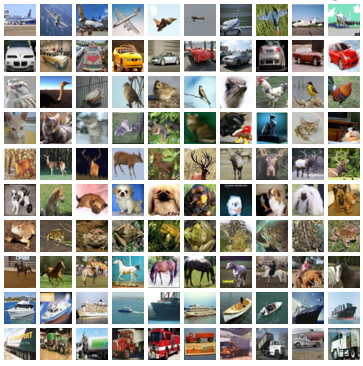

## 2 - Implementación de CNN para Cifar-10
### 2.1 - Librerias
En primer lugar importamos las librerias numpy y matplotlib, esta última para poder visualizar imágenes.
También importaremos la base de datos de cifar-10

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from keras.datasets import cifar10

Using TensorFlow backend.


Ahora importamos el resto de librerias para poder construir nuestra red convolucional. 

In [2]:
from keras.models import Sequential
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers import Flatten, Dense, Dropout
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.utils import np_utils
from keras.models import load_model
import random
num = random.randint(0,100)
np.random.seed(num)


### 2.2 - Pre-procesamiento de los datos
Creamos los sets de entrenamiento y de validación, el primero tendrá 50000 imágenes de 32x32 y el segundo 10000 imágenes.

In [3]:
(x_train,y_train), (x_test,y_test) = cifar10.load_data()

Los valores de los píxeles entán en el rango de 0 a 255 para cada uno de los canales rojo, verde y azul. Es bueno trabajar con los datos normalizados, y esto se consigue dividiendo cada valor por 255.

In [4]:
x_train = x_train/255.0
x_test = x_test/255.0

Usamos una codificación en caliente (one-hot) para transformarlos en una matriz binaria de ancho de 10.

In [5]:
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

### 2.3 - Creación del modelo
Vamos a definir una estructura simple de CNN como línea base. Utilizaremos una estructura con dos capas convolucionales seguidas de una capa de max-pooling y una red a capas conectadas para hacer predicciones.
1. Capa de entrada convolucional, 32 mapas de características de 3x3 y una activación relu.
2. Abandono fijado del 20% (Dropout).
3. Capa convolucional, 32 mapas de características de 3x3 y una activación relu.
4. Capa de max-Pooling de tamaño 2x2.
5. Capa Flatten.
6. Capa totalmente conectada con 512 unidades y una función de activación relu.
7. Abandono al 50% (Dropout).
8. Capa de salida conectada a 10 unidades y una función de activación softmax.

Utilizaremos el modelo *Sequential()* para crear la estructura.

In [6]:
model = Sequential()

model.add(Conv2D(32, (3,3), input_shape=(32,32,3), padding='same', activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))

model.add(Conv2D(32, (3,3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(512, activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.5))

model.add(Dense(num_classes, activation='softmax'))

epochs = 25
lrate = 0.01
decay = lrate/epochs

sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               4194816   
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)              

### 2.4 - Compilación del modelo
Ajustamos el modelo con 25 épocas y un tamaño de lote 32. Evalueamos el modelo en el conjunto de datos de prueba e imprimimos la precisión de la clasificación.

In [7]:
model.fit(x_train, y_train, validation_data=(x_test,y_test), epochs=epochs, batch_size=32)
scores = model.evaluate(x_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Train on 50000 samples, validate on 10000 samples
Epoch 1/25
50000/50000 [==============================] - 169s 3ms/step - loss: 1.6807 - accuracy: 0.3926 - val_loss: 1.4054 - val_accuracy: 0.4899
Epoch 2/25
50000/50000 [==============================] - 154s 3ms/step - loss: 1.3304 - accuracy: 0.5206 - val_loss: 1.2096 - val_accuracy: 0.5693
Epoch 3/25
50000/50000 [==============================] - 151s 3ms/step - loss: 1.1579 - accuracy: 0.5881 - val_loss: 1.0731 - val_accuracy: 0.6227
Epoch 4/25
50000/50000 [==============================] - 152s 3ms/step - loss: 1.0349 - accuracy: 0.6334 - val_loss: 1.0219 - val_accuracy: 0.6339
Epoch 5/25
50000/50000 [==============================] - 153s 3ms/step - loss: 0.9391 - accuracy: 0.6669 - val_loss: 0.9845 - val_accuracy: 0.6510
Epoch 6/25
50000/50000 [==============================] - 153s 3ms/step - loss: 0.8596 - accuracy: 0.6942 - val_loss: 0.9469 - val_accuracy: 0.6685
Epoch 7/25
50000/50000 [==============================] - 153s

Como vemos hemos realizado pruebas con los datos para determinar cuanta precisión posee nuestra red convolucional. Si nos fijamos en la última época la precisión es de 91.9% y la precisión de validación llega hasta el 70%. Así determinamos que con nuestra red CNN podemos clasificar imágenes del conjunto cifar-10 con un 70% de precisión, es decir, de cada 100 imágenes unas 30 son clasificadas incorrectamenete.
